In [2]:
%pylab inline
import numpy as np
import os
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


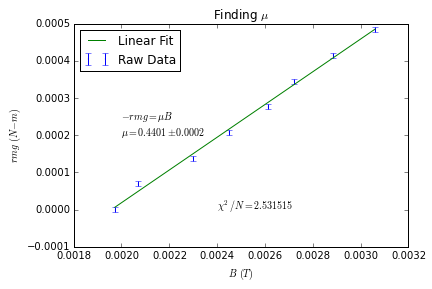

In [3]:
ydata = np.multiply([1e-6, .5, 1, 1.5, 2, 2.5, 3, 3.5],(1.410e-3*9.8)/100)
xdata = np.multiply(1.36e-3, [1.45, 1.52, 1.69, 1.8, 1.92, 2, 2.12, 2.25])
xdata_err = np.multiply(np.sqrt( np.power(np.multiply(np.ones_like(xdata), .2),2)
                         +np.power(np.divide(.05, [1.45, 1.52, 1.69, 1.8, 1.92, 2, 2.12, 2.25]), 2)), xdata)
ydata_err = np.multiply( np.sqrt(np.power(np.divide(.05e-2, np.array([1e-6, .5, 1, 1.5, 2, 2.5, 3, 3.5])/100), 2) 
                                 + (1e-6/1.410e-3)**2), ydata )

p, V = np.polyfit(xdata, ydata, 1, cov=True)

lin = np.poly1d(p)

data = np.transpose(vstack((xdata, xdata_err, ydata, ydata_err)))

head = "rmg \t delta_rmg \t muB \t delta_muB"

os.chdir("/users/aman/desktop/phys211/esr/data")

np.savetxt("magnetic_moment_run1.tsv", data, delimiter="\t", header = head)

os.chdir("/users/aman/desktop")

chisq = np.sum( (lin(xdata) - ydata)**2/ydata_err**2 )/len(ydata)

errorbar(xdata, ydata, yerr=ydata_err, fmt='o',ms = .1, label = "Raw Data")
plot(xdata, lin(xdata), label = "Linear Fit")
xlabel("$B \, (T)$")
ylabel("$rmg \, (N-m)$")
title("Finding $\mu$")
text(.002, .0002, "$-rmg = \mu B$"\
         "\n"
        "$\mu = %.4f\pm %.4f$" % (p[0], V[0,0]))
text(.0024, 0, "$\chi^2/N = %f$" % chisq)
legend(loc = 0)
savefig("/users/aman/desktop/phys211/esr/plots/rmgvsmub.pdf")

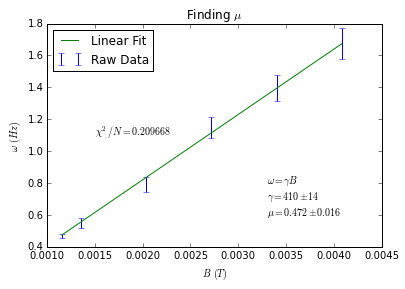

In [4]:
omega = np.divide(2*np.pi, [np.mean([12.8, 14.15, 12.13, 14.08, 13.60]), 11.41, 7.93, 5.48, 4.5, 3.75])
B = np.multiply(1.36e-3, [.85, 1, 1.5, 2, 2.5, 3])

sigma = np.std([12.8, 14.15, 12.13, 14.08, 13.60])
mu = np.mean([12.8, 14.15, 12.13, 14.08, 13.60])
T = np.array([mu, 11.41, 7.93, 5.48, 4.5, 3.75])
T_err = np.array([sigma/np.sqrt(5), T[1]*(sigma/mu), T[2]*(sigma/mu), T[3]*(sigma/mu), T[4]*(sigma/mu), T[5]*(sigma/mu)])

omega_err = (T_err/T)*omega

B_err = np.multiply(np.sqrt(np.power(np.multiply(np.ones_like(B), .2),2)
                         +np.power(np.divide(.05, [.85, 1, 1.5, 2, 2.5, 3]), 2)), B)

L = .00115
dL = 1e-6

def lin(x, *p):
    return p[0]*x

p, V = curve_fit(lin, B, omega, p0 = [.2])

yFit = lin(B, *p)

data = np.transpose(vstack((omega, omega_err, B, B_err)))

head = "omega \t delta_omega \t B \t delta_B"

os.chdir("/users/aman/desktop/phys211/esr/data")

np.savetxt("magnetic_moment_run2.tsv", data, delimiter="\t", header = head)

os.chdir("/users/aman/desktop")

chisq = np.sum( (yFit - omega)**2/omega_err**2 )/len(omega)

errorbar(B, omega, yerr = omega_err, fmt = 'o', ms = .1, label = "Raw Data")
plot(B, yFit, label = "Linear Fit")
ylabel("$\omega \, (Hz)$")
xlabel("$B \, (T)$")
title("Finding $\mu$")
text(0.0033,0.6, "$\omega = \gamma B$"\
         "\n"\
        "$\gamma = %.0f\pm %.0f$"\
         "\n"\
        "$\mu = %.3f \pm %.3f$"% (p[0], V[0,0], p[0]*L, (V[0,0]/p[0] + dL/L)*p[0]*L))
text(.0015, 1.1, "$\chi^2/N = %f$" % chisq)
plt.legend(loc = 0)
plt.savefig("/users/aman/desktop/phys211/esr/plots/omegavsB.pdf")

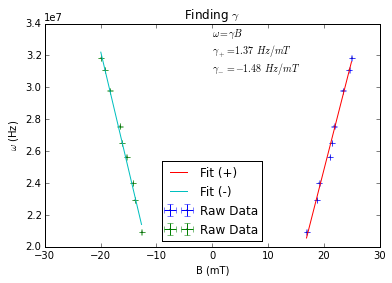

In [5]:
frequency = np.array([20.91, 22.93, 24.01, 25.65, 26.5, 27.55, 29.8, 31.07, 31.83]) * 1e6
vplus = np.array([35.2, 39.2, 40.0, 44.0, 44.8, 45.6, 48.8, 51.2, 52.0])
vminus = np.array([-26.4, -28.8, -29.6, -32.0, -33.6, -34.4, -38.2, -40.0, -41.6])

Bplus = vplus * 0.48e-3
Bminus = vminus * 0.48e-3

vplus_err = .1/vplus
vminus_err = .1/vminus

Bplus_err = vplus_err*Bplus
Bminus_err = vminus_err*Bminus

freq_err = ones_like(frequency) * .01 * 1e6

pplus, Vplus = np.polyfit(Bplus, frequency, 1, cov=True)

linplus = np.poly1d(pplus)

pminus, Vminus = np.polyfit(Bminus, frequency, 1, cov=True)

linminus = np.poly1d(pminus)

chisqplus = np.sum( (linplus(Bplus) - frequency)**2/freq_err**2 )/len(frequency)
chisqminus = np.sum( (linminus(Bminus) - frequency)**2/freq_err**2 )/len(frequency)

errorbar(Bplus, frequency, xerr = Bplus_err, yerr = freq_err, fmt = 'o', ms = .5, label = "Raw Data")
errorbar(Bminus, frequency, xerr = Bminus_err, yerr = freq_err, fmt = 'o', ms = .5, label = "Raw Data")
plot(Bplus, linplus(Bplus), label = "Fit (+)")
plot(Bminus, linminus(Bminus), label = "Fit (-)")
text(-.01,3.2e7, "$\omega = \gamma B$"\
         "\n"\
        "$\gamma_+ = %.2f \, Hz/mT$" % (1.37))
text(-.01,3.1e7, "$\gamma_- = %.2f \, Hz/mT$" % (-1.48))
#text(-.01, 3e7, "$\chi_+^2/N = %f$" % chisqplus)
#text(-.01, 2.9e7, "$\chi_-^2/N = %f$" % chisqminus)
xlabel("B (mT)")
ylabel("$\omega$ (Hz)")
title("Finding $\gamma$")
legend(loc = 0)
savefig("/users/aman/desktop/phys211/esr/plots/findinggamma.pdf")

In [6]:
R = 2.69e-2
M = .1373
Om = 4.6*2*pi

L = .4*M*R**2*Om

f = sqrt( ((.4)*(R**2)*(Om)*(1e-5))**2 + ((.8)*(M)*(R)*(Om)*(5e-4))**2 + ((.4)*(M)*(R**2)*(0.1*2*pi))**2 )

print L, f

0.00114861051733 4.94643887269e-05
